**Level 1 – Project 1: Iris Flower Classification using Logistic Regression**
#
Dataset: Iris from sklearn

Tools: pandas, matplotlib, seaborn, scikit-learn

Steps: Load → Visualize → Preprocess → Train → Evaluate

Models Used: Logistic Regression, explored KNN, SVM, Decision Tree

Accuracy: 100% on test set

Notebook: iris_model.ipynb

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
iris = load_iris()

In [39]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df['target'].apply(lambda i: iris.target_names[i])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [40]:
print(df['flower_name'].value_counts())


flower_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


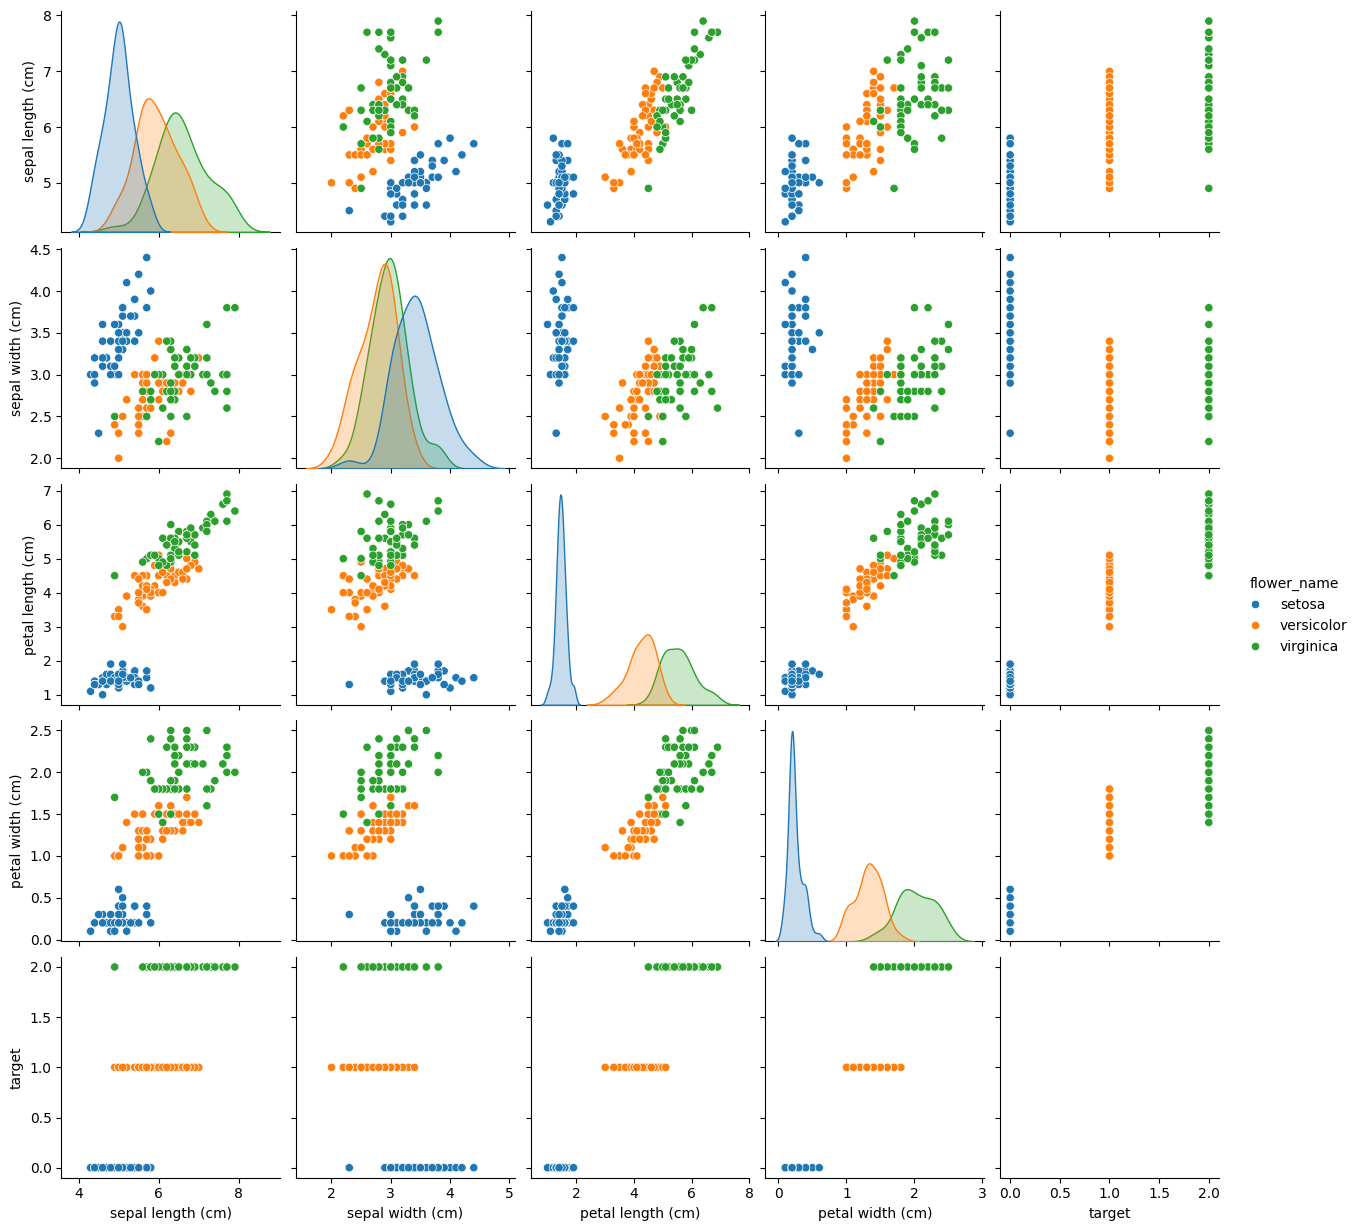

In [41]:
sns.pairplot(df, hue="flower_name")
plt.show()


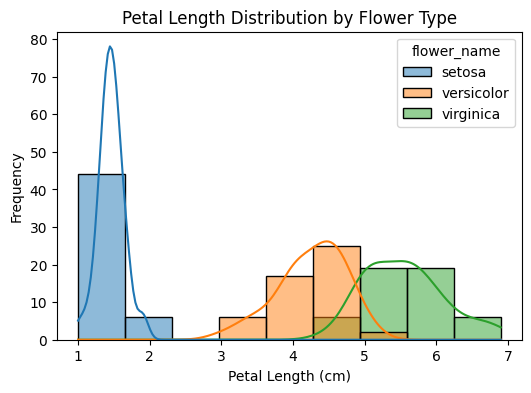

In [42]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='petal length (cm)', hue='flower_name', kde=True)
plt.title("Petal Length Distribution by Flower Type")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()


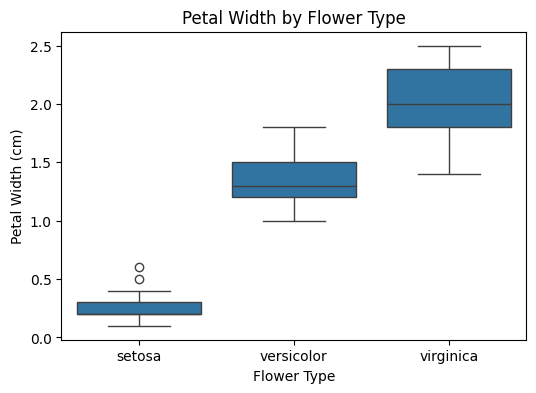

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='flower_name', y='petal width (cm)')
plt.title("Petal Width by Flower Type")
plt.xlabel("Flower Type")
plt.ylabel("Petal Width (cm)")
plt.show()


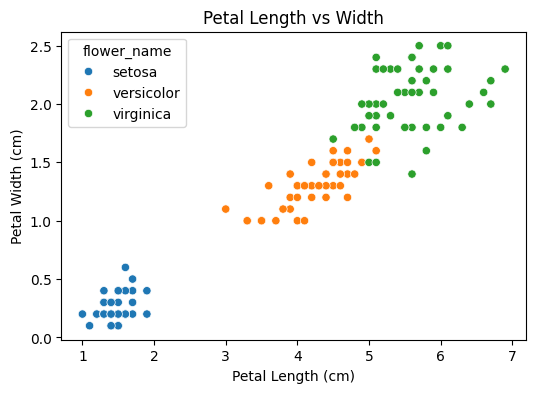

In [44]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='flower_name')
plt.title("Petal Length vs Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()


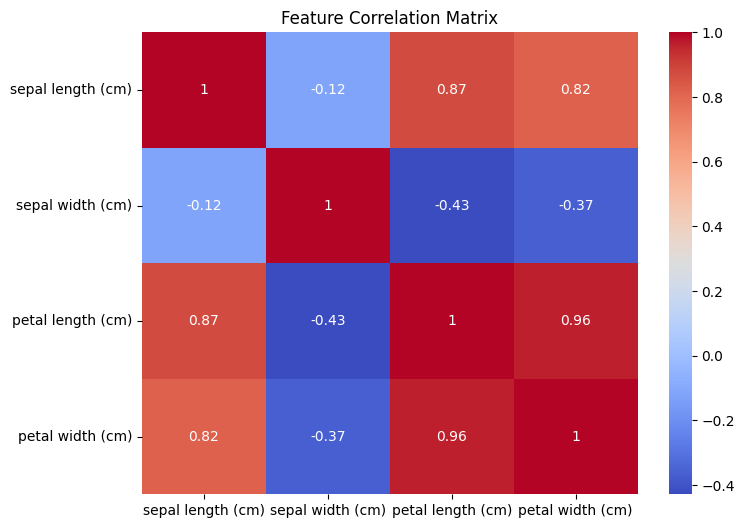

In [45]:
plt.figure(figsize=(8,6))
corr_matrix = df[iris.feature_names].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()



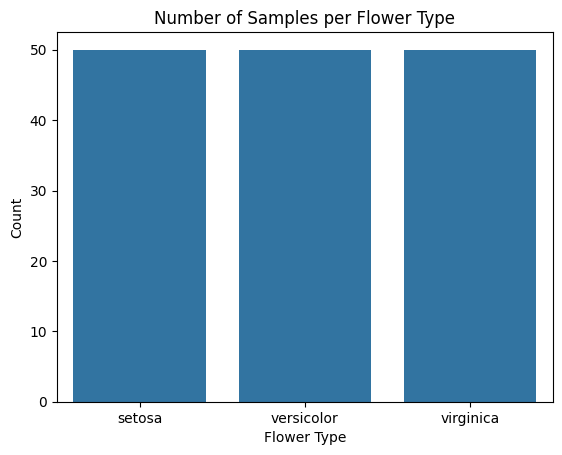

In [46]:
sns.countplot(data=df, x='flower_name')
plt.title("Number of Samples per Flower Type")
plt.xlabel("Flower Type")
plt.ylabel("Count")
plt.show()


**Data Preprocessing**

In [47]:
# Features (inputs)
X = df[iris.feature_names]

# Labels (outputs)
y = df['target']


In [48]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
print("Before Scaling:")
print(X_train.head())

print("\nAfter Scaling (first 5 rows):")
print(X_train_scaled[:5])


Before Scaling:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2

After Scaling (first 5 rows):
[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]


**Model Training**

In [51]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=200)  # increase iterations if needed

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Coefficients for each feature per class
print("Model Coefficients:\n", model.coef_)

# Intercepts
print("\nModel Intercepts:\n", model.intercept_)


Model Coefficients:
 [[-1.00316587  1.14487318 -1.8113482  -1.69251025]
 [ 0.52799044 -0.28319987 -0.34060665 -0.72013959]
 [ 0.47517543 -0.86167331  2.15195485  2.41264984]]

Model Intercepts:
 [-0.13377225  1.98264649 -1.84887424]


In [52]:
y_pred = model.predict(X_test_scaled)


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



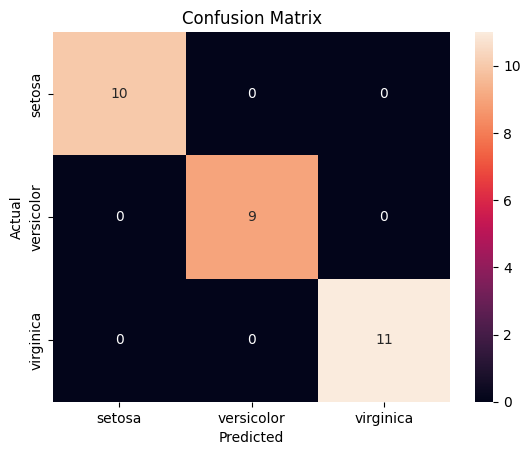

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


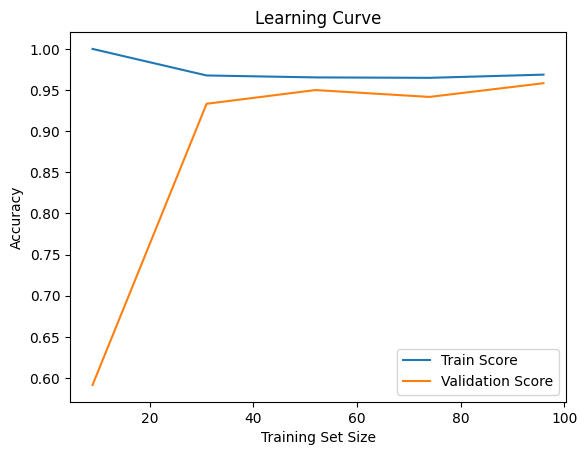

In [55]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)

# Plot learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()
